## Cargar y Preprocesar Imágenes

In [1]:
import os
import cv2
import numpy as np

# Directorio que contiene las imágenes de flores
data_dir = 'flower_photos/'

# Listas para almacenar características y etiquetas
X = []
y = []

# Recorre cada subdirectorio (cada clase de flor)
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        # Recorre cada imagen en el subdirectorio
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            # Lee la imagen y conviértela a escala de grises
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            # Redimensiona la imagen a un tamaño fijo (por ejemplo, 100x100)
            resized_image = cv2.resize(image, (100, 100))
            # Añade la imagen redimensionada a la lista de características
            X.append(resized_image.flatten())
            # Añade la etiqueta correspondiente a la lista de etiquetas
            y.append(class_name)

# Convierte las listas de características y etiquetas a matrices NumPy
X = np.array(X)
y = np.array(y)

# Guardar las características y etiquetas en archivos numpy
np.save('features.npy', X)
np.save('labels.npy', y)


## Entrenar el Modelo SVM

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import joblib
import numpy as np

# Cargar los datos preparados
X = np.load('features.npy')
y = np.load('labels.npy')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
accuracy = svm_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Guardar el modelo entrenado en un archivo
joblib.dump(svm_classifier, 'svm_model.pkl')


Accuracy: 0.28337874659400547


['svm_model.pkl']

## Preparar Nuevas Imágenes

In [3]:
import os
import shutil

# Directorios
source_dir = 'flower_photos'
destination_dir = 'nuevas_imagenes_flores'

# Crear el directorio de destino si no existe
os.makedirs(destination_dir, exist_ok=True)

# Número de imágenes a copiar por clase (opcional)
num_images_to_copy = 5

# Recorre cada subdirectorio en el directorio fuente
for class_name in os.listdir(source_dir):
    class_dir = os.path.join(source_dir, class_name)
    if os.path.isdir(class_dir):
        # Listar imágenes en el subdirectorio
        images = os.listdir(class_dir)
        # Copiar algunas imágenes al directorio de destino
        for image_name in images[:num_images_to_copy]:
            source_path = os.path.join(class_dir, image_name)
            destination_path = os.path.join(destination_dir, f"{class_name}_{image_name}")
            shutil.copy(source_path, destination_path)

print("Imágenes copiadas exitosamente.")


Imágenes copiadas exitosamente.


## Predicción y Visualización

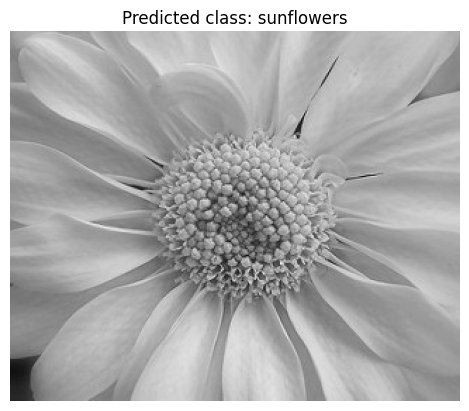

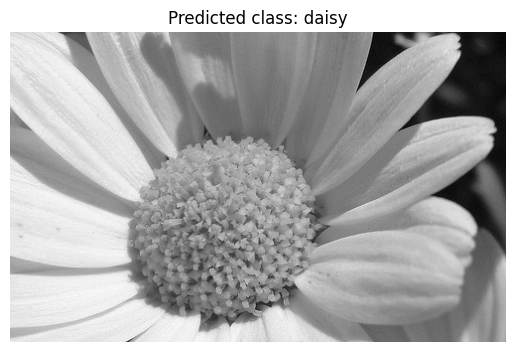

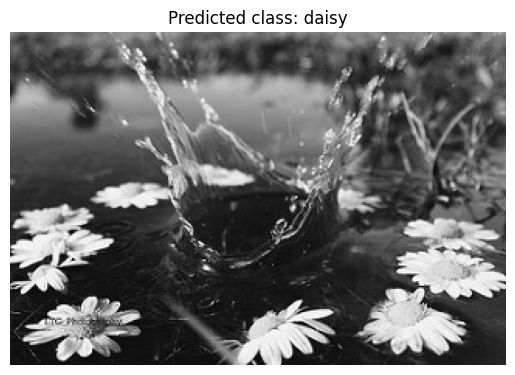

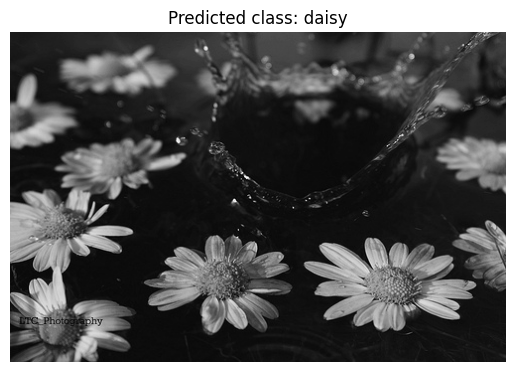

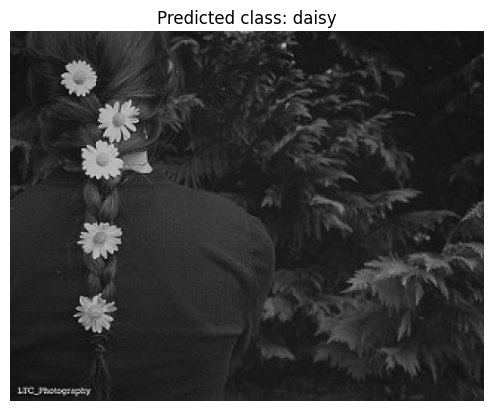

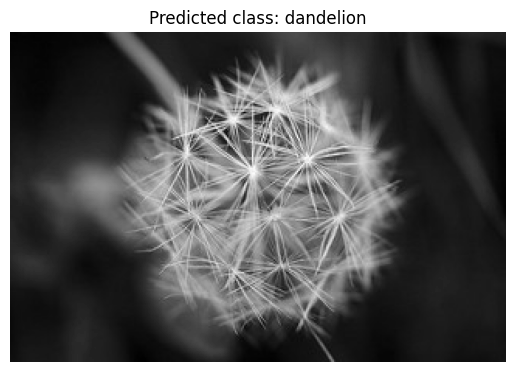

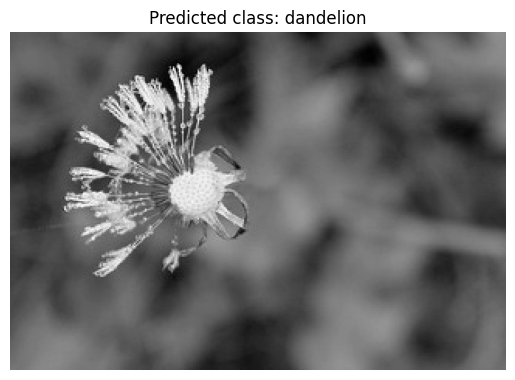

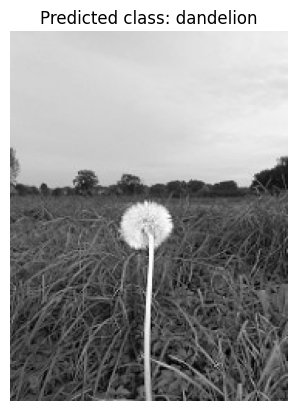

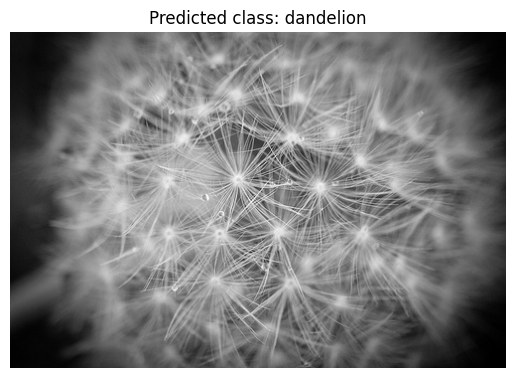

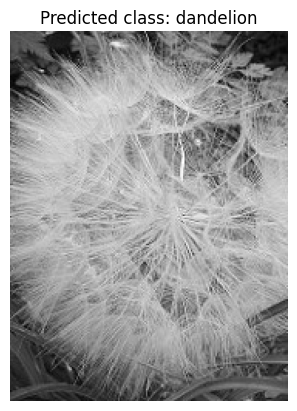

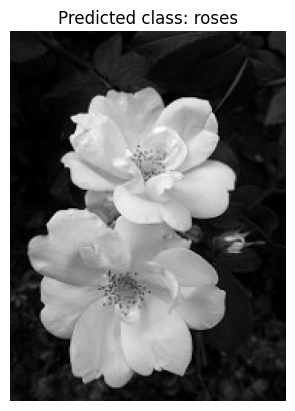

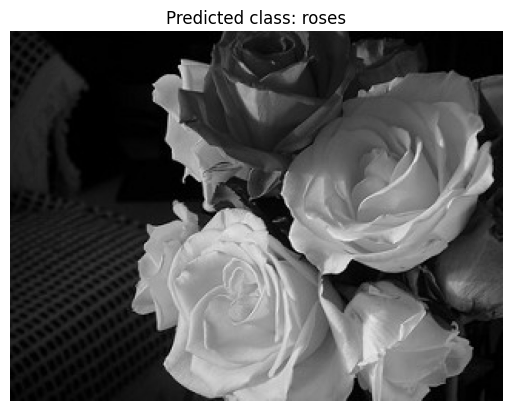

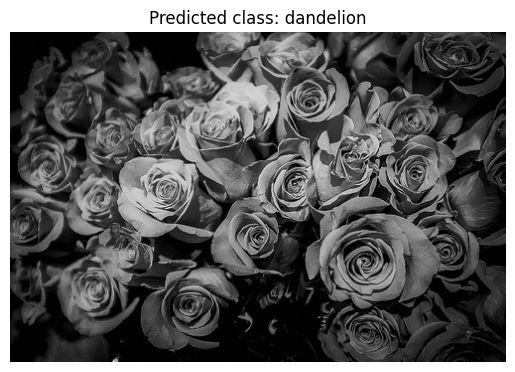

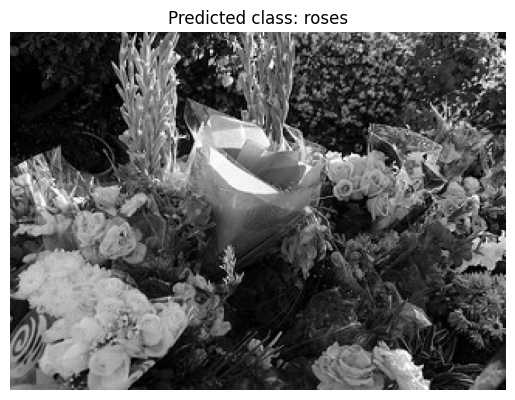

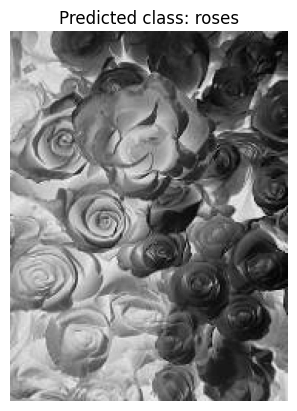

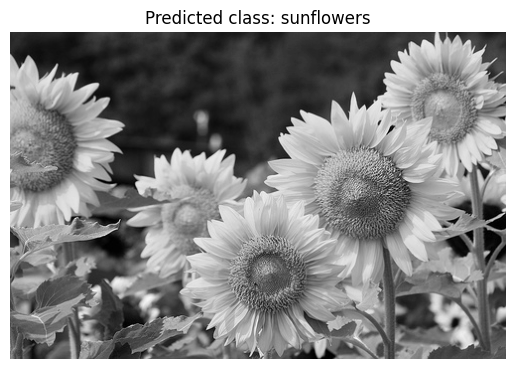

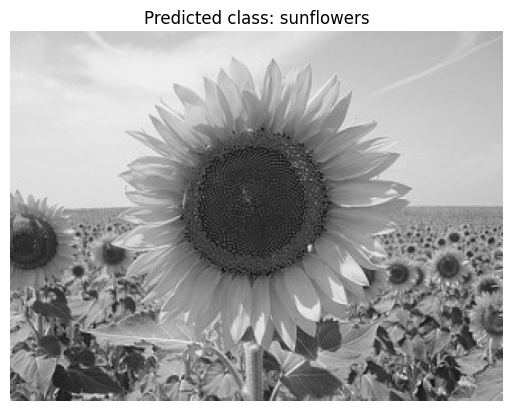

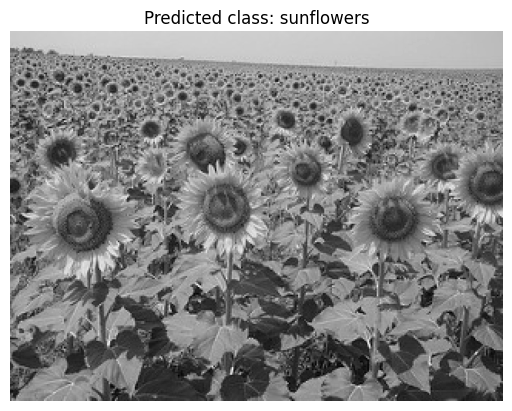

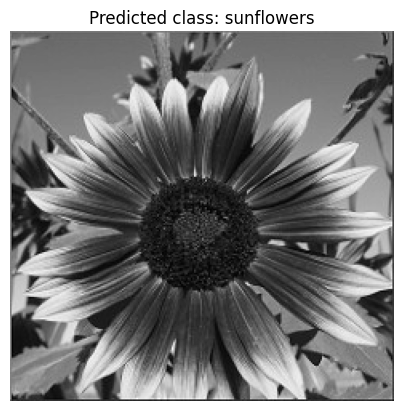

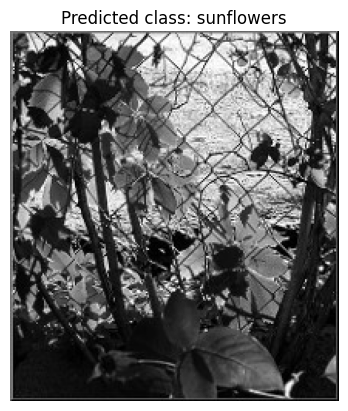

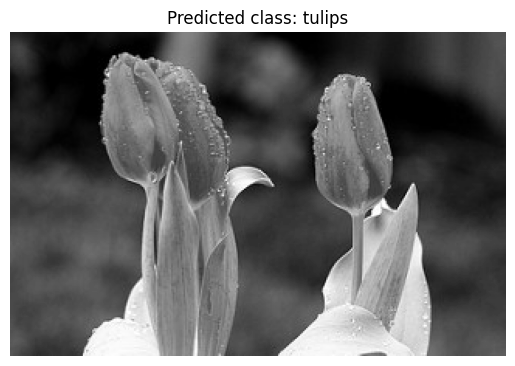

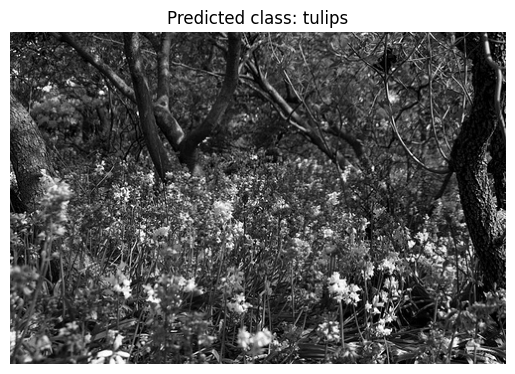

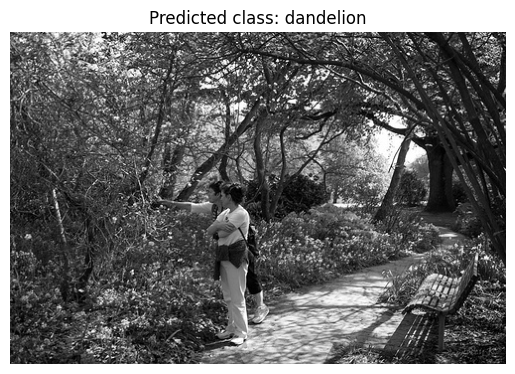

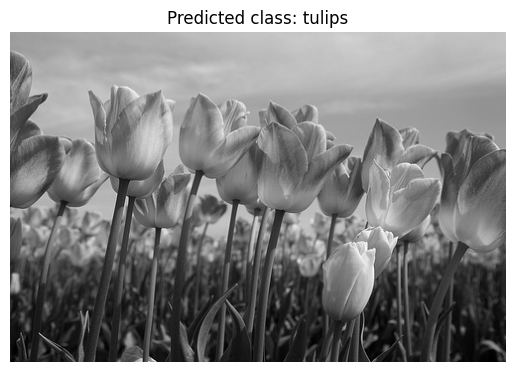

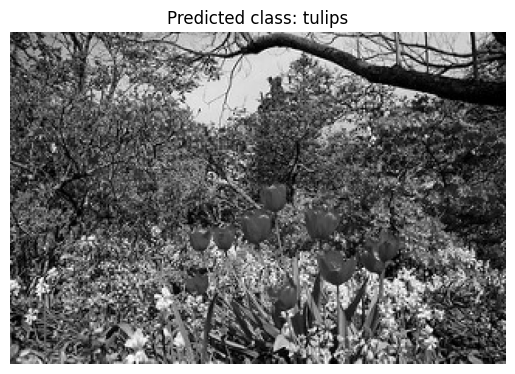

In [4]:
import cv2
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt

# Cargar el modelo entrenado
svm_model = joblib.load('svm_model.pkl')

# Directorio que contiene las nuevas imágenes de flores
new_images_dir = 'nuevas_imagenes_flores/'

# Recorre cada imagen en el directorio
for image_name in os.listdir(new_images_dir):
    image_path = os.path.join(new_images_dir, image_name)
    if os.path.isfile(image_path):
        # Leer y preprocesar la imagen
        new_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        resized_image = cv2.resize(new_image, (100, 100))
        new_features = resized_image.flatten()

        # Hacer una predicción con el modelo SVM
        predicted_class = svm_model.predict([new_features])[0]
        #print(f"Image: {image_name} - Predicted class: {predicted_class}")

         # Mostrar la imagen y la predicción
        plt.imshow(new_image, cmap='gray')
        plt.title(f"Predicted class: {predicted_class}")
        plt.axis('off')
        plt.show()
